In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
file = pd.read_csv('/content/gdrive/MyDrive/Kaggle datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
file.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6900,Male,1,No,No,51,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.00,4905.75,No
1329,Female,0,Yes,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.40,1496.45,No
918,Female,0,No,No,26,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.70,2193,No
2010,Male,0,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.90,357.75,Yes
3102,Female,0,No,No,5,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check,54.20,308.25,Yes
1950,Male,0,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),91.85,5940.85,Yes
5266,Male,0,Yes,Yes,37,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,58.75,2203.1,No
752,Male,0,Yes,Yes,7,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),71.35,515.75,No
186,Male,0,No,No,20,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,51.80,1023.85,No
101,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.45,19.45,No


In [ ]:
file.drop('customerID', axis='columns', inplace=True)
file.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
file.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(file.TotalCharges)

ValueError: ignored

In [ ]:
# what this line of code does is that it is going to convert the specified column values from string dtype to numeric dtype.
# will also ignore the errors for empty entries
# will also check and disply whether the values are null or not in boolean form for all entries of the column
pd.to_numeric(file.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# only displaying the entries which are actually null.
file[pd.to_numeric(file.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
file.shape

(7043, 20)

In [ ]:
#copying the contents of first file into new file but excluding the entries having null or ' ' values in TotalCharges column.
file_new = file[file.TotalCharges !=" "]
file_new.shape

(7032, 20)

In [ ]:
file_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# after empty or null entries are dealt with, then we convert the "TotalCharges" dtype to numeric.
pd.to_numeric(file_new.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
file_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# after empty or null entries are dealt with, then we convert the "TotalCharges" dtype to numeric.
file_new.TotalCharges = pd.to_numeric(file_new.TotalCharges)

<ipython-input-90-fe940bdaca7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_new.TotalCharges = pd.to_numeric(file_new.TotalCharges)


In [ ]:
file_new.TotalCharges.dtypes

dtype('float64')

In [ ]:
# checking which customers are leaving the company and which ones aren't by checking the value of churn

tenure_churn_no = file_new[file_new.Churn=='No'].tenure
tenure_churn_yes = file_new[file_new.Churn=='Yes'].tenure

In [ ]:
tenure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

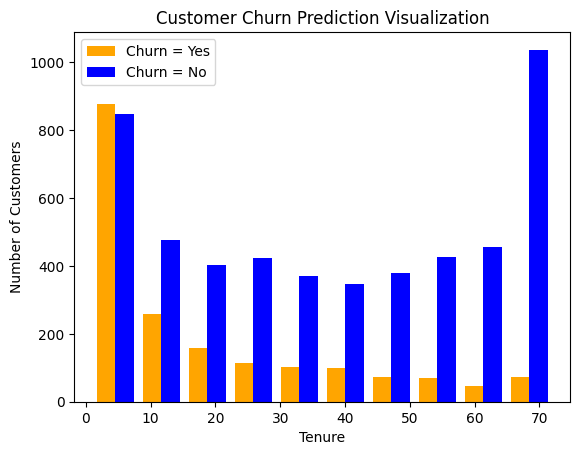

In [ ]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no], color=['orange','blue'], label=['Churn = Yes','Churn = No'])
plt.legend()

In [ ]:
# displaying all columns/attributes with their possible values
#  if statement restricts to only display columns having values of object datatype
def print_unique_col_values(file):
  for column in file:
    if file[column].dtypes=='object':
      print(f'{column}: {file[column].unique()}')

In [ ]:
print_unique_col_values(file)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:
file_new.replace('No internet service','No', inplace=True)
file_new.replace('No phone service','No', inplace=True)

<ipython-input-97-93493be6833b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_new.replace('No internet service','No', inplace=True)
<ipython-input-97-93493be6833b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_new.replace('No phone service','No', inplace=True)


In [ ]:
print_unique_col_values(file_new)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
# converting values in (0,1) for cloumns that only have any of two outputs, Yes or No
yes_no_columns = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',  'PaperlessBilling',  'Churn']
for col in yes_no_columns:
  file_new[col].replace({'Yes':1,'No':0 },inplace=True)

<ipython-input-100-0afea4c2e41a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_new[col].replace({'Yes':1,'No':0 },inplace=True)


In [ ]:
for col in file_new:
  print(f'{col}: {file_new[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
# replacing values in 'gender' column with 0 and 1
file_new['gender'].replace({'Female':1, 'Male':0}, inplace=True)

<ipython-input-102-84c348c31bd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_new['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [ ]:
file_new['gender'].unique()

array([1, 0])

**Will be doing One Hot encoding for data/columns having more than two possible values**

```
# This is formatted as code
```



In [ ]:
file_new2 = pd.get_dummies(data=file_new, columns=['InternetService','Contract','PaymentMethod'] )
file_new2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
file_new2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6413,1,0,1,1,32,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4261,0,0,0,0,57,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3729,0,0,0,0,62,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4224,1,0,1,0,71,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
566,0,0,1,1,15,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
file_new2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# selecting columns that need to be scaled to values between 0 and 1
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

file_new2[cols_to_scale] = scaler.fit_transform(file_new2[cols_to_scale])


In [ ]:
file_new2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6487,1,0,1,0,0.845070,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2047,0,0,0,0,0.028169,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
3639,1,1,1,0,0.830986,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
6296,1,1,1,0,0.422535,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
2564,0,0,0,0,0.239437,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
for col in file_new2:
  print(f'{col}: {file_new2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
# cotains all columns except Churn
X = file_new2.drop('Churn', axis = 'columns')

# contains only churn
Y = file_new2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=5)
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
Y_train.shape

(5625,)

## **Creating our Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy']
              )
model.fit(X_train,Y_train, epochs=150)

Epoch 1/150
176/176 [==============================] - 2s 3ms/step - loss: 0.5332 - accuracy: 0.7424
Epoch 2/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7931
Epoch 3/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8018
Epoch 4/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8023
Epoch 5/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8057
Epoch 6/150
176/176 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8025
Epoch 7/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8085
Epoch 8/150
176/176 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8087
Epoch 9/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8119
Epoch 10/150
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accura

In [ ]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7761


[0.49659213423728943, 0.7761194109916687]

In [ ]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [ ]:
y_pred[:10]

array([[0.46050048],
       [0.56478447],
       [0.00570345],
       [0.8047735 ],
       [0.3484855 ],
       [0.5041409 ],
       [0.36292398],
       [0.5677032 ],
       [0.3409811 ],
       [0.2587284 ]], dtype=float32)

In [ ]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
y_pred_N = []
for element in y_pred:
  if element > 0.5:
    y_pred_N.append(1)
  else:
    y_pred_N.append(0)

In [ ]:
print(y_pred_N[:10])

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]


In [ ]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred_N))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       999
           1       0.61      0.64      0.63       408

    accuracy                           0.78      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

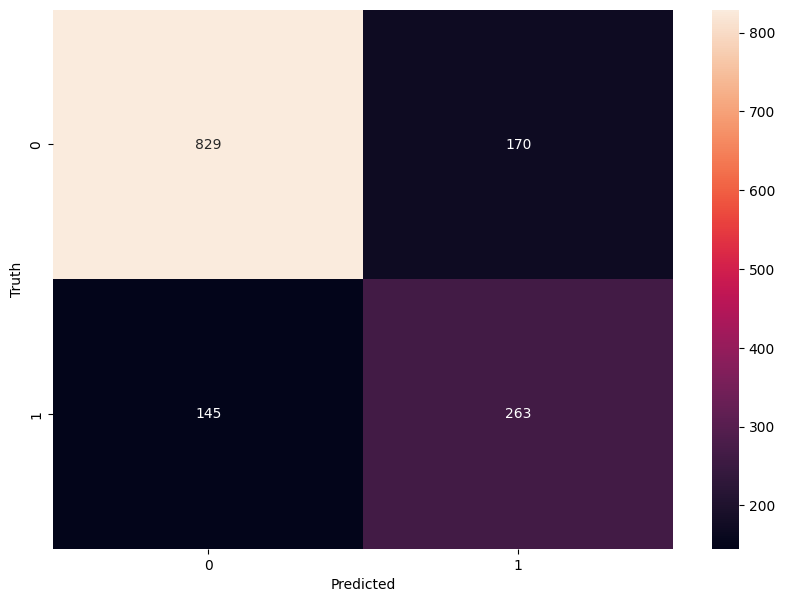

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred_N)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# calculating accuracy
round((829+263)/(829+170+145+263),2)

0.78

In [ ]:
pip install pipreqs

In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/Customer_Churn_Prediction

/content/gdrive/MyDrive/Colab Notebooks/Customer_Churn_Prediction


In [ ]:
!pipreqs

INFO: Successfully saved requirements file in /content/gdrive/MyDrive/Colab Notebooks/Customer_Churn_Prediction/requirements.txt


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
